<a href="https://colab.research.google.com/github/Karthik0042/MA5755_Intro-to-Machine-Learning/blob/main/MNIST_bs22b022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## First Implementation

Iteration 0: Accuracy = 14.77%
Iteration 50: Accuracy = 45.15%
Iteration 100: Accuracy = 61.03%
Iteration 150: Accuracy = 69.66%
Prediction: 0
Label: 5


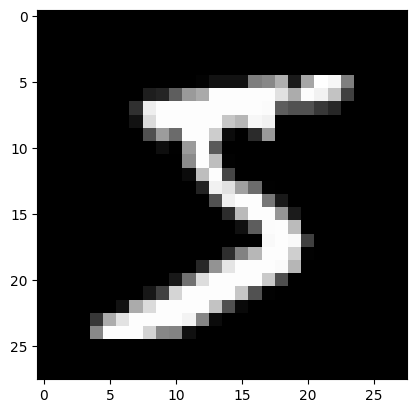

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras


(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the images
x_train_flat = x_train.reshape(x_train.shape[0], -1).T
x_test_flat = x_test.reshape(x_test.shape[0], -1).T

m_train = x_train_flat.shape[1]


def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    exp_Z = np.exp(Z)
    return exp_Z / np.sum(exp_Z, axis=0)

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return (Z > 0).astype(int)

def one_hot(Y):
    one_hot_Y = np.zeros((10, Y.size))
    one_hot_Y[Y, np.arange(Y.size)] = 1
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = X.shape[1]
    one_hot_Y = one_hot(Y)

    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, alpha=0.1, dW1=dW1, db1=db1, dW2=dW2, db2=db2)

        if i % 50 == 0:
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y)
            print(f"Iteration {i}: Accuracy = {accuracy:.2%}")

    return W1, b1, W2, b2

W1, b1, W2, b2 = gradient_descent(x_train_flat, y_train, alpha=0.1, iterations=500)

def test_prediction(index, X, Y, W1, b1, W2, b2):
    current_image = X[:, index, None]
    prediction = get_predictions(forward_prop(W1, b1, W2, b2, current_image)[3])
    label = Y[index]

    print("Prediction:", prediction[0])
    print("Label:", label)

    plt.imshow(current_image.reshape((28, 28)), cmap='gray')
    plt.show()

test_prediction(0, x_train_flat, y_train, W1, b1, W2, b2)


## 2nd Implemetation

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
print(x_train.dtypes)


x_train_flat = x_train.reshape(x_train.shape[0], -1).T
x_test_flat = x_test.reshape(x_test.shape[0], -1).T

print(x_train_flat.dtypes)
m_train = x_train_flat.shape[1]
print(m_train.dtypes)
def init_params():

    W1 = np.random.rand(20, 784) - 0.5
    b1 = np.random.rand(20, 1) - 0.5

    W2 = np.random.rand(10, 20) - 0.5
    b2 = np.random.rand(10, 1) - 0.5


    W3 = np.random.rand(10, 10) - 0.5
    b3 = np.random.rand(10, 1) - 0.5

    return W1, b1, W2, b2, W3, b3

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    Z -= np.max(Z, axis=0)
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A

def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)

    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)

    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)

    return Z1, A1, Z2, A2, Z3, A3


def ReLU_deriv(Z):
    return (Z > 0).astype(int)

def one_hot(Y):
    one_hot_Y = np.zeros((10, Y.size))
    one_hot_Y[Y, np.arange(Y.size)] = 1
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    m = X.shape[1]
    one_hot_Y = one_hot(Y)


    dZ3 = A3 - one_hot_Y
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3, axis=1, keepdims=True)


    dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)


    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2, dW3, db3

def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    W3 -= alpha * dW3
    b3 -= alpha * db3

    return W1, b1, W2, b2, W3, b3


def get_predictions(A3):
    return np.argmax(A3, axis=0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)

        if i % 100 == 0:
            predictions = get_predictions(A3)
            accuracy = get_accuracy(predictions, Y)
            print(f"Iteration {i}: Accuracy = {accuracy:.2%}")

    return W1, b1, W2, b2, W3, b3

W1, b1, W2, b2, W3, b3 = gradient_descent(x_train_flat, y_train, alpha=0.1, iterations=1000)

def test_prediction(index, X, Y, W1, b1, W2, W3, b3):
    current_image = X[:, index, None]
    prediction = get_predictions(forward_prop(W1, b1, W2, b2, W3, b3, current_image)[3])
    label = Y[index]

    print("Prediction:", prediction[0])
    print("Label:", label)

    plt.imshow(current_image.reshape((28, 28)), cmap='gray')
    plt.show()

[test_prediction(i, x_train_flat, y_train, W1, b1, W2, W3, b3) for i in range(0,5)]



11490434/11490434 [==============================] - 0s 0us/step


AttributeError: 'numpy.ndarray' object has no attribute 'dtypes'

## Simple Tensorflow Implemetation

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3677 - accuracy: 0.8914 - val_loss: 0.2116 - val_accuracy: 0.9388
Epoch 2/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2549 - accuracy: 0.9265 - val_loss: 0.1867 - val_accuracy: 0.9460
Epoch 3/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2283 - accuracy: 0.9352 - val_loss: 0.1960 - val_accuracy: 0.9452
Epoch 4/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2213 - accuracy: 0.9369 - val_loss: 0.2016 - val_accuracy: 0.9467
Epoch 5/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2113 - accuracy: 0.9398 - val_loss: 0.2221 - val_accuracy: 0.9370
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2074 - accuracy: 0.9411 - val_loss: 0.1965 - v

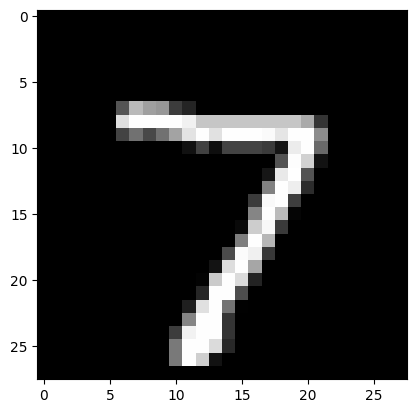

None
1/1 [==============================] - 0s 19ms/step
Predicted class: 2
Actual class: 2


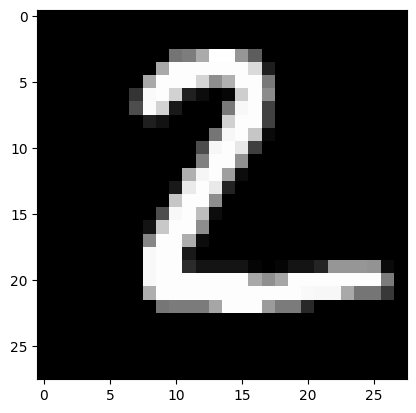

None
1/1 [==============================] - 0s 20ms/step
Predicted class: 1
Actual class: 1


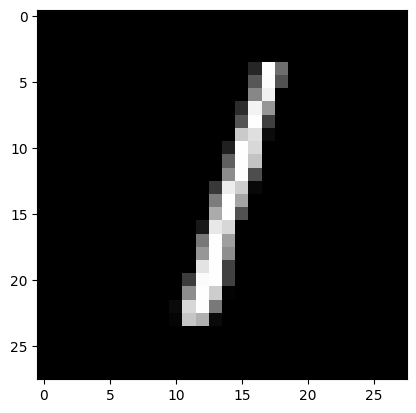

None


[None, None, None]

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train_flat = x_train.reshape(-1, 784)
x_test_flat = x_test.reshape(-1, 784)
print(x_train_flat)

#The Model With 2 hidden Layers
model = keras.Sequential([
    layers.Dense(20, activation='relu', input_shape=(784,)),
    layers.Dense(10, activation='relu'),
    layers.Dense(10, activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flat, y_train, epochs=10, validation_split=0.1)


test_loss, test_accuracy = model.evaluate(x_test_flat, y_test, verbose=0)
print("Test accuracy:", test_accuracy)


def test_prediction(index):
    current_image = x_test[index]
    current_image_flat = x_test_flat[index]

    prediction = model.predict(np.expand_dims(current_image_flat, 0))
    predicted_class = np.argmax(prediction)

    print(f"Predicted class: {predicted_class}")
    print(f"Actual class: {y_test[index]}")


    plt.imshow(current_image, cmap='gray')
    plt.show()

[print(test_prediction(i)) for i in range(3)]

